# csv 파일을 Pandas DataFrame으로 받고, 수집 기간동안의 평균 소모 칼로리, 평균 이동거리, 평균 step수를 출력해 보세요.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Data_analysis_basic_2022/fitbit_data.csv') #csv 파일 로드
df = pd.DataFrame(data) #데이터 프레임 생성
df.head()

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467


In [74]:
# 0인 결측치 처리
df = df.replace(0,np.NaN)

In [75]:
df.isnull().sum()

date          0
calories      0
distances    61
steps        60
dtype: int64

In [76]:
# 평균 값으로 결측치 채우기
df['distances'].fillna((df['distances'].mean()),inplace  = True)
df['steps'].fillna((df['steps'].mean()),inplace = True)

In [77]:
df.isnull().sum()

date         0
calories     0
distances    0
steps        0
dtype: int64

In [78]:
print("평균 소모 칼로리 : ",df['calories'].mean())
print("평균 이동 거리 : ",df['distances'].mean())
print("평균 step 수 : ",df['steps'].mean())

평균 소모 칼로리 :  1828.5578455089824
평균 이동 거리 :  4.460377349056603
평균 step 수 :  6153.691588785047


# x축은 date, y축은 calories로 꺾은선 그래프를 그려 보세요.

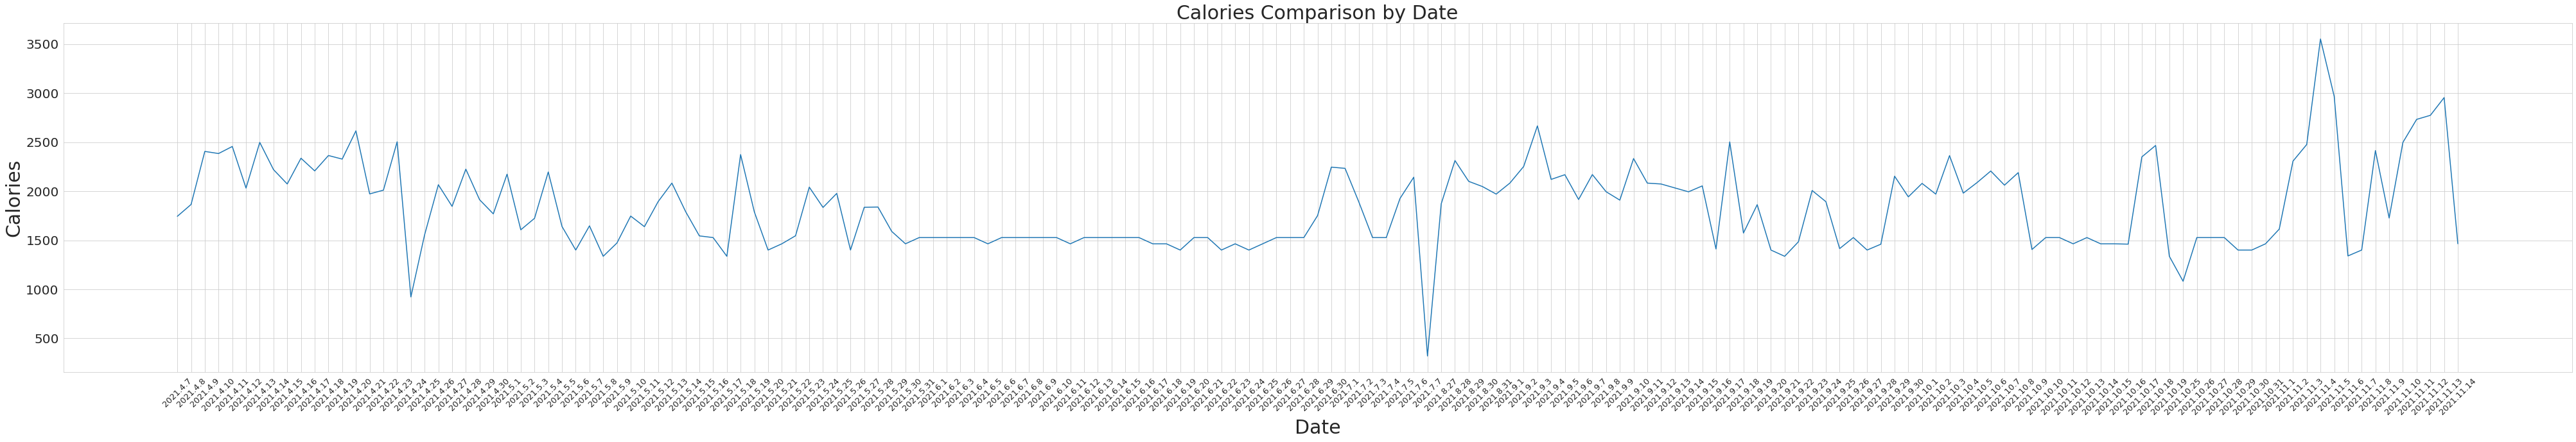

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(70,10))
plt.plot(df.date,df.calories)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=20)
plt.title("Calories Comparison by Date",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Calories",fontsize=30)
plt.show()

이동한 거리(distance)와 소모된 칼로리(calories)와의 관계를 알아보고자 합니다.
x축은 distance, y축은 calories로 산점도를 그려보세요. (scatter plotting)

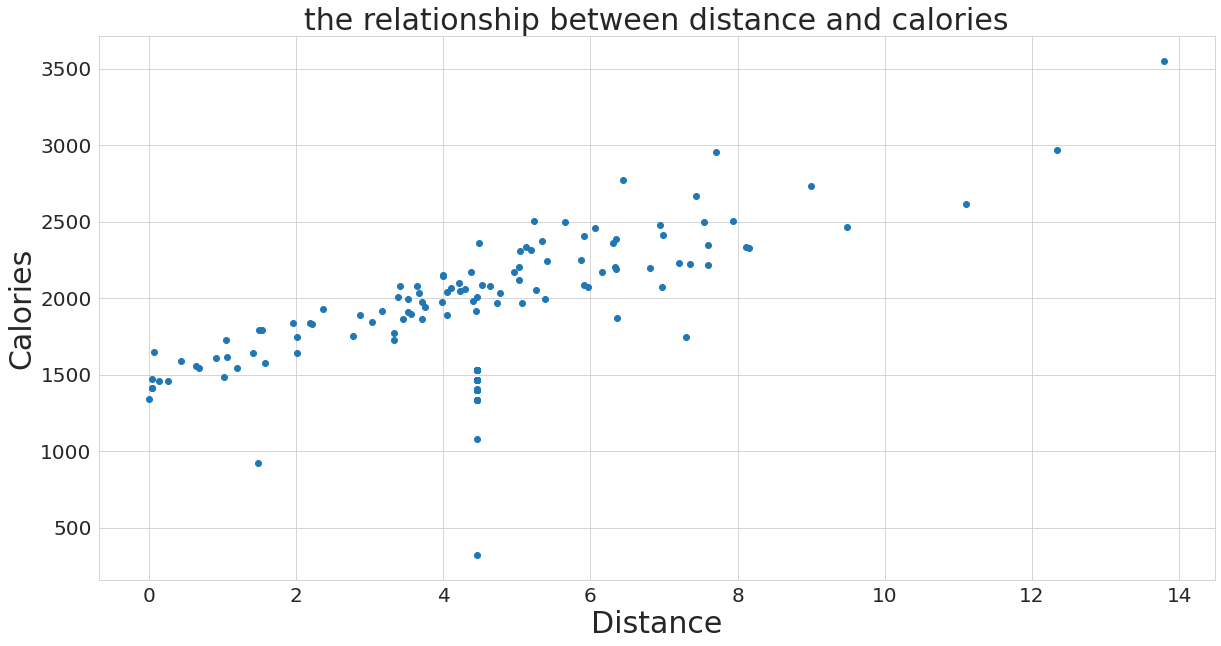

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(df.distances,df.calories,alpha=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("the relationship between distance and calories",fontsize=30)
plt.xlabel("Distance",fontsize=30)
plt.ylabel("Calories",fontsize=30)
plt.show()

요일 별로 소모 칼로리, 이동거리, 평균 steps 수를 분석해 보고 나름대로의 결론을 내려보세요.

In [81]:
df['date']

0        2021.4.7
1        2021.4.8
2        2021.4.9
3       2021.4.10
4       2021.4.11
          ...    
162    2021.11.10
163    2021.11.11
164    2021.11.12
165    2021.11.13
166    2021.11.14
Name: date, Length: 167, dtype: object

In [82]:
df['date'] = pd.to_datetime(df['date'],format='%Y.%m.%d')

In [83]:
df['date']

0     2021-04-07
1     2021-04-08
2     2021-04-09
3     2021-04-10
4     2021-04-11
         ...    
162   2021-11-10
163   2021-11-11
164   2021-11-12
165   2021-11-13
166   2021-11-14
Name: date, Length: 167, dtype: datetime64[ns]

In [84]:
df['Day of The Week'] = df.date.dt.day_name()

In [85]:
df.head()

,date,calories,distances,steps,Day of The Week
0,2021-04-07,1744.27,7.300000,10174.0,Wednesday
1,2021-04-08,1865.11,3.460000,4829.0,Thursday
2,2021-04-09,2406.20,5.920000,8262.0,Friday
3,2021-04-10,2384.56,6.350000,8864.0,Saturday
4,2021-04-11,2456.50,6.059999,8467.0,Sunday


In [86]:
weeks = ['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
weekdata = df.groupby('Day of The Week').mean()
weekdata = weekdata.agg(weeks)

In [87]:
weekdata

,calories,distances,steps
Monday,1771.546667,4.411407,6120.788162
Tuesday,1850.301250,4.481376,6210.647196
Wednesday,1812.871250,4.621376,6419.897196
Thursday,1895.617826,4.739696,6550.066640
Friday,1988.057917,5.047193,7024.326713
Saturday,1716.314592,3.620959,4769.451713
Sunday,1767.989583,4.312272,5997.179128


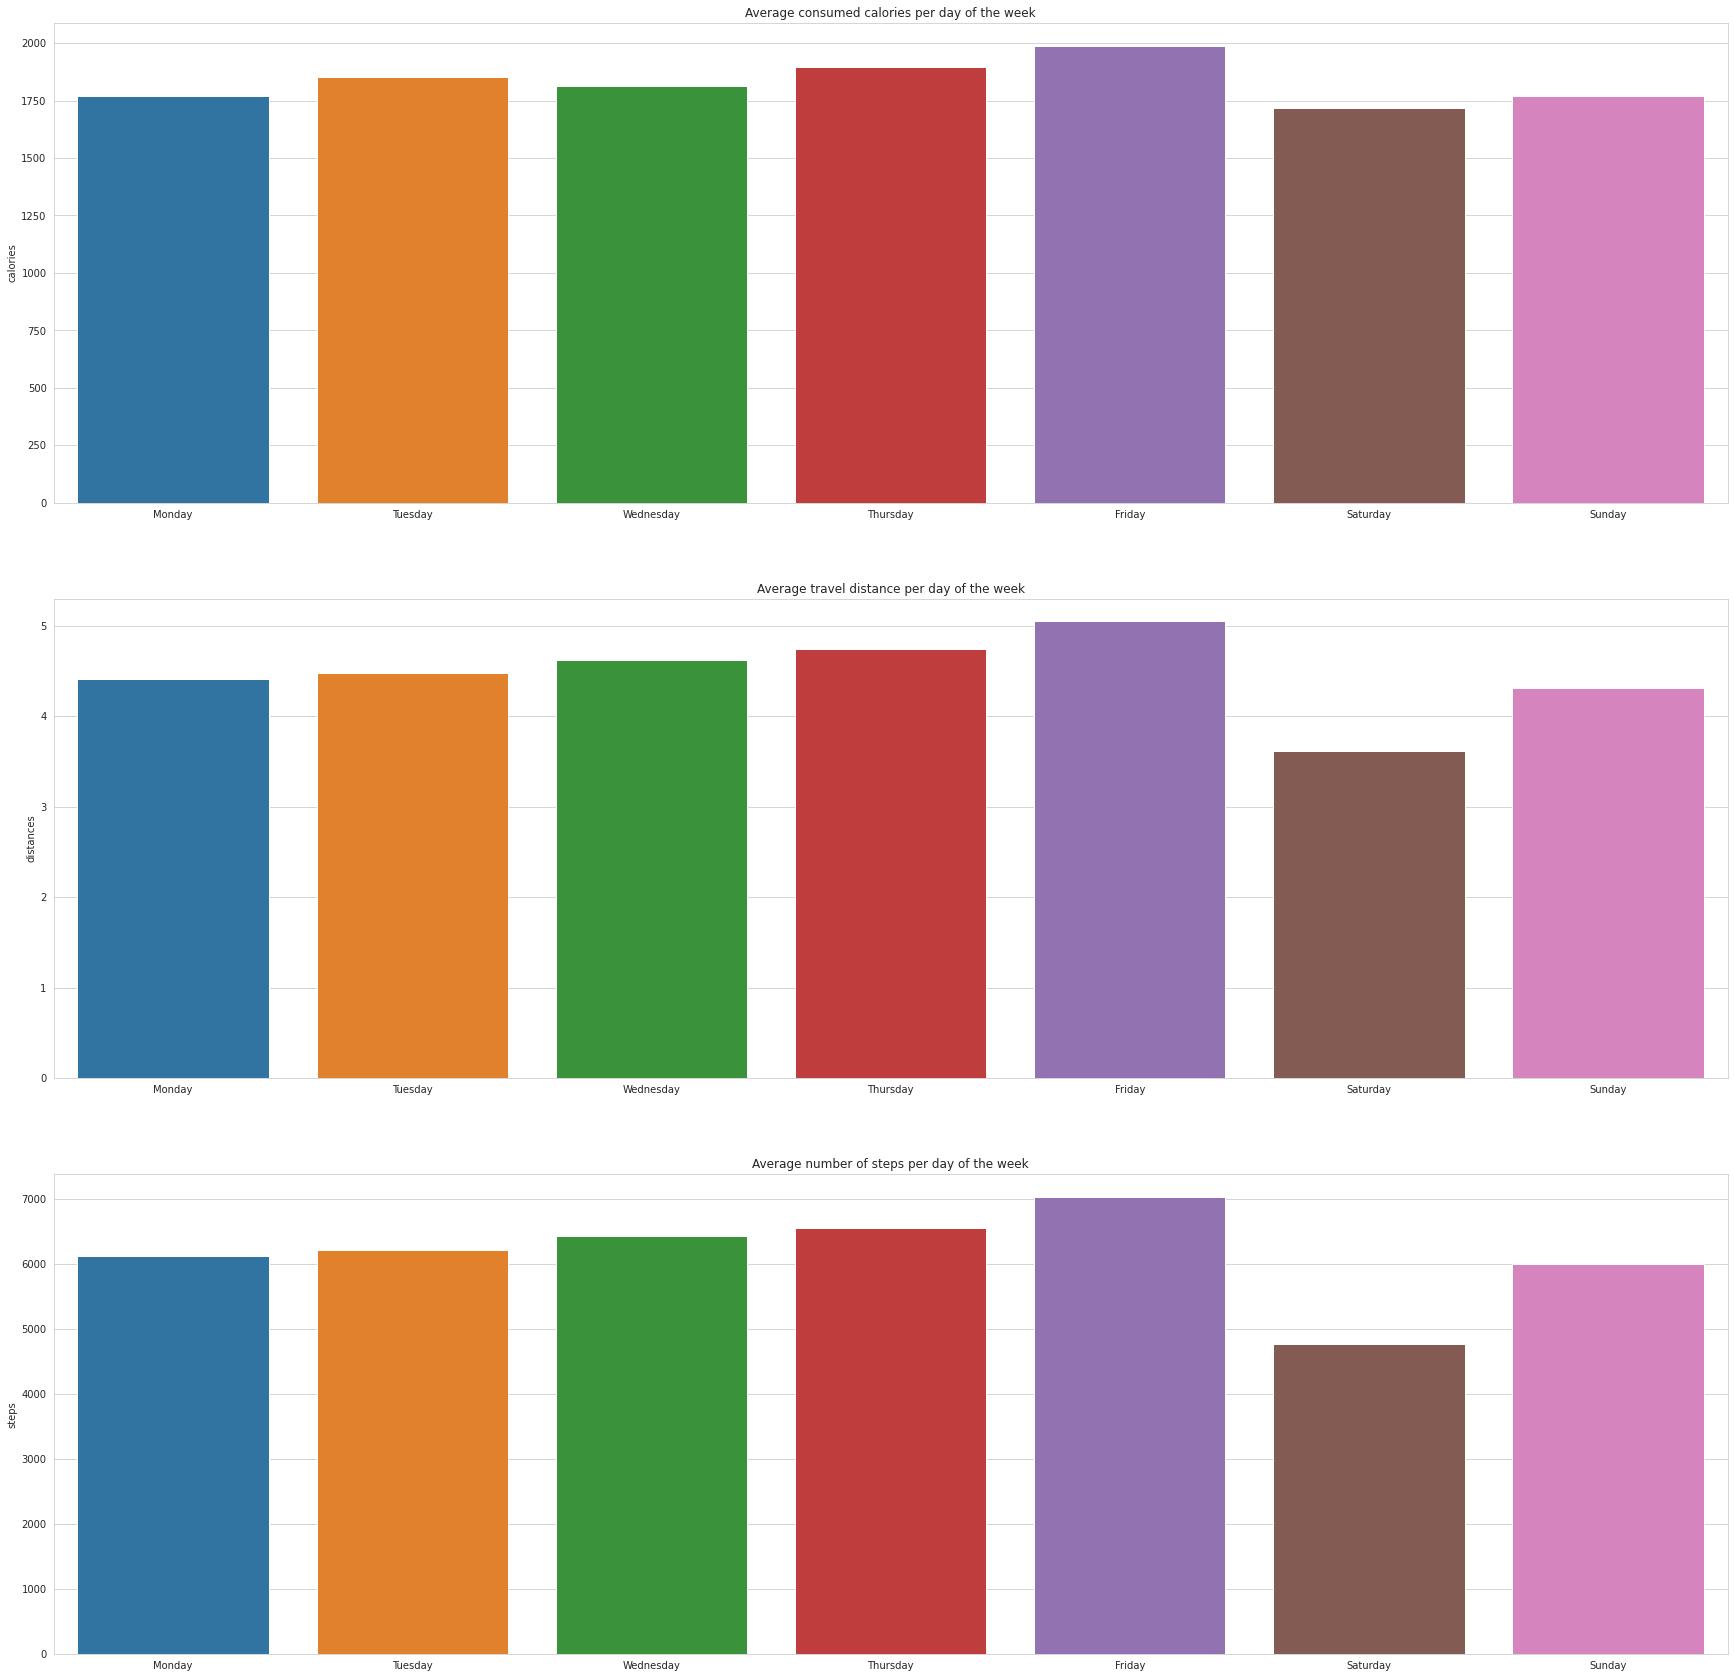

In [88]:
import seaborn as sns

sns.set_style('whitegrid')
f , axes = plt.subplots(3,1)
axes = axes.flatten()
f.set_size_inches(30,30)
sns.barplot(data=weekdata,x=weekdata.index,y='calories', ax=axes[0]).set(title='Average consumed calories per day of the week')
sns.barplot(data=weekdata,x=weekdata.index,y='distances', ax=axes[1]).set(title='Average travel distance per day of the week')
sns.barplot(data=weekdata,x=weekdata.index,y='steps', ax=axes[2]).set(title='Average number of steps per day of the week')
plt.show()